   age  gender  blood_pressure  cholesterol  diabetes  smoking  \
0   69       0             103          212         1        0   
1   32       0             178          290         0        1   
2   89       1             173          165         0        0   
3   78       0              91          252         1        0   
4   38       0             159          230         0        1   

   physical_activity  disease  
0                  1        0  
1                  0        1  
2                  0        0  
3                  0        1  
4                  1        0  
Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       173
           1       0.87      0.82      0.84       127

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.87       300
weighted avg       0.87      0.87      0.87       300



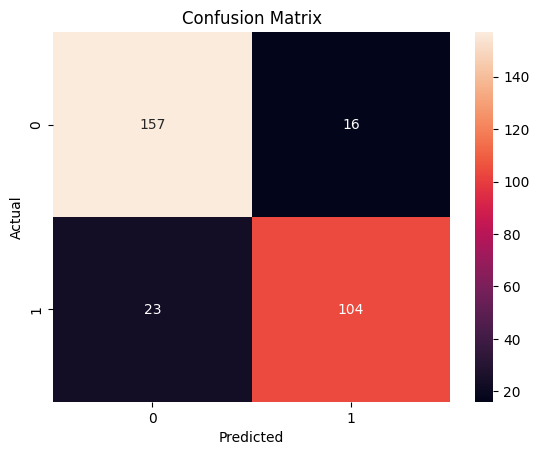

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 1000

data = pd.DataFrame({
    'age': np.random.randint(18, 90, n_samples),
    'gender': np.random.randint(0, 2, n_samples),
    'blood_pressure': np.random.randint(90, 180, n_samples),
    'cholesterol': np.random.randint(100, 300, n_samples),
    'diabetes': np.random.randint(0, 2, n_samples),
    'smoking': np.random.randint(0, 2, n_samples),
    'physical_activity': np.random.randint(0, 2, n_samples),
})

# Introduce some correlation with the target variable
data['disease'] = (
    0.3 * (data['age'] > 50) +
    0.3 * (data['blood_pressure'] > 140) +
    0.2 * (data['cholesterol'] > 200) +
    0.2 * data['diabetes'] +
    0.1 * data['smoking'] -
    0.2 * data['physical_activity'] +
    np.random.normal(0, 0.1, n_samples)
) > 0.5

data['disease'] = data['disease'].astype(int)

# Display the first few rows of the dataset
print(data.head())

# Splitting the dataset into features and target
X = data.drop('disease', axis=1)
y = data['disease']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
